# **VISÃO COMPUTACIONAL**
## Geração da Base de Dados: `Bart2Homer`

In [1]:
# importando bibliotecas

import os
import pathlib
import time
import datetime

import numpy as np
from matplotlib import pyplot as plt

from IPython import display

import cv2
import tensorflow as tf

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Obtendo as imagens dos Simpsons

In [3]:
dataset_name = 'Simpsons'
_URL = f'https://github.com/andrehochuli/teaching/raw/main/ComputerVision/' \
        'Lecture%2008%20-%20Classification/Simpsons.zip'

path_to_zip = tf.keras.utils.get_file(
    fname=f'{dataset_name}.zip',
    origin=_URL,
    extract=True
)

path_to_zip = pathlib.Path(path_to_zip)
PATH = path_to_zip.parent/dataset_name

14744419/14744419 [==============================] - 0s 0us/step


In [4]:
list(PATH.parent.iterdir())

[PosixPath('/root/.keras/datasets/Simpsons'),
 PosixPath('/root/.keras/datasets/Simpsons.zip')]

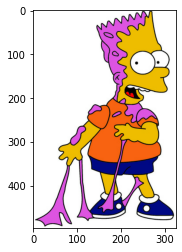

(497, 326, 3)


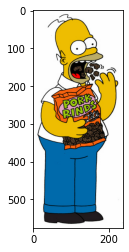

(576, 237, 3)


In [5]:
# exibindo uma imagem de amostra do bart e homer

for character in ['bart', 'homer']:
    sample_image = tf.io.read_file(str(PATH/f'Treino/{character}001.jpg'))
    sample_image = tf.io.decode_jpeg(sample_image)

    plt.imshow(sample_image);
    plt.show();
    print(sample_image.shape)

## Criação do dataset `Bart2Homer`
Construa pares de imagens contendo Bart e Homer (500 pares ou mais) e utilize  técnicas  de  Data  Augmentation  para  melhorar  a  representação  (rotação,  zoom,  brilho, etc). 

In [6]:
# obtendo duas listas de imagens do bart e do homer

train_files = os.listdir('/root/.keras/datasets/Simpsons/Treino')
test_files = os.listdir('/root/.keras/datasets/Simpsons/Teste')

bart_files_train = [i for i in train_files if 'bart' in i]
bart_files_test = [i for i in test_files if 'bart' in i]

homer_files_train = [i for i in train_files if 'homer' in i]
homer_files_test = [i for i in test_files if 'homer' in i]

print(bart_files_train[:5])
print(homer_files_train[:5])

['bart018.jpg', 'bart072.jpg', 'bart052.jpg', 'bart031.jpg', 'bart061.jpg']
['homer042.jpg', 'homer005.jpg', 'homer054.jpg', 'homer018.jpg', 'homer037.jpg']


In [7]:
# arrays com as imagens do bart e homer
bart_images_train = [cv2.imread(str(PATH/f'Treino/{bart_files_train[i]}')) for i in range(len(bart_files_train))]
bart_images_test = [cv2.imread(str(PATH/f'Teste/{bart_files_test[i]}')) for i in range(len(bart_files_test))]

homer_images_train = [cv2.imread(str(PATH/f'Treino/{homer_files_train[i]}')) for i in range(len(homer_files_train))]
homer_images_test = [cv2.imread(str(PATH/f'Teste/{homer_files_test[i]}')) for i in range(len(homer_files_test))]

# arrays com as imagens redimensionadas
bart_images_train_res = [cv2.resize(i, (256, 256)) for i in bart_images_train]
bart_images_test_res = [cv2.resize(i, (256, 256)) for i in bart_images_test]

homer_images_train_res = [cv2.resize(i, (256, 256)) for i in homer_images_train]
homer_images_test_res = [cv2.resize(i, (256, 256)) for i in homer_images_test]

(296, 268, 3)
(256, 256, 3)


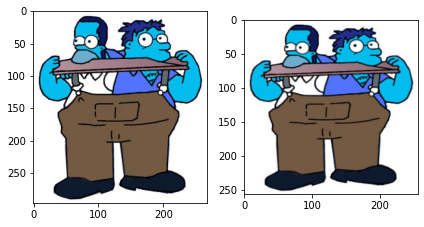

In [8]:
# imagem original e redimensionada

fig, ax = plt.subplots(1,2)

ax[0].imshow(homer_images_train[0]);
ax[1].imshow(homer_images_train_res[0]);
plt.tight_layout();

print(homer_images_train[0].shape)
print(homer_images_train_res[0].shape)

(256, 512, 3)


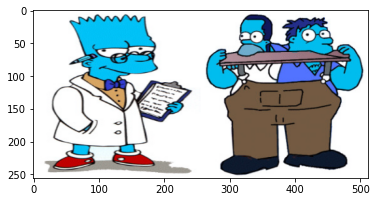

In [9]:
# exemplo de concatenação de imagens

concat = np.hstack([bart_images_train_res[2], homer_images_train_res[0]])
plt.imshow(concat);
print(concat.shape)

In [10]:
# dicionário de nomes de imagens: imagens

bart_dict = {k: v for k,v in zip(bart_files_train, bart_images_train_res)}
homer_dict = {k: v for k,v in zip(homer_files_train, homer_images_train_res)}

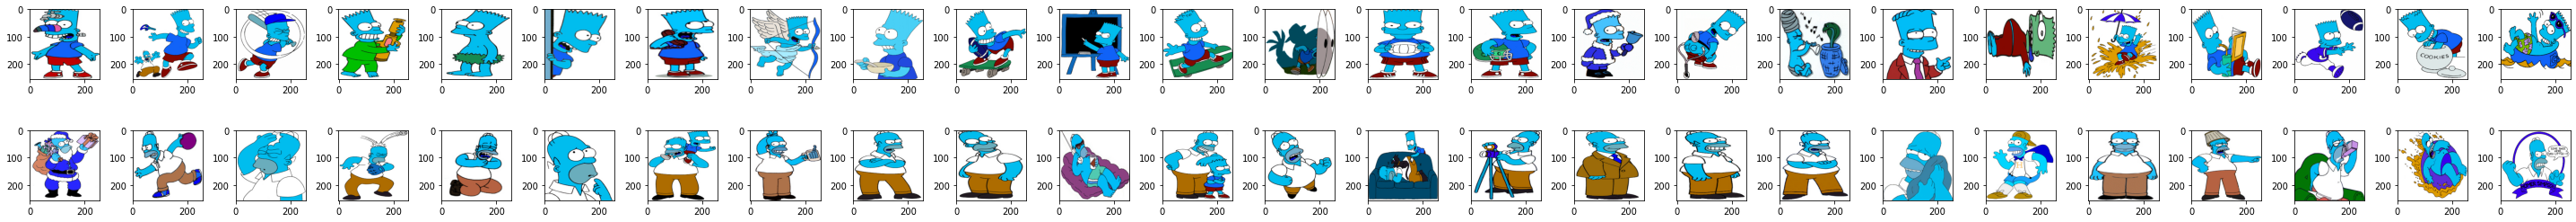

In [11]:
# escolhendo 25 imagens aleatórias do bart e 25 do homer

np.random.seed = 556

bart_choices = np.random.choice(bart_files_train, size=25, replace=False)
homer_choices = np.random.choice(homer_files_train, size=25, replace=False)

fig, ax = plt.subplots(2, 25, figsize=(40,4))

for i, (bart, homer) in enumerate(zip(bart_choices, homer_choices)):
    ax[0][i].imshow(bart_dict[bart]);
    ax[1][i].imshow(homer_dict[homer]);

plt.tight_layout();

In [12]:
# combinando todas os barts com todos os homers
# 25*25 = 625 novas imagens

concat_images = []

for bart_img in bart_choices:
    for homer_img in homer_choices:
        concat = np.hstack([bart_dict[bart_img], homer_dict[homer_img]])
        concat_images.append(concat)

In [13]:
# separando 85% da base para treino e 25% para teste 

X_train = np.array(concat_images[:int(len(concat_images)*.85)])
X_test = np.array(concat_images[int(len(concat_images)*.85):])

X_train.shape, X_test.shape

((531, 256, 512, 3), (94, 256, 512, 3))

(625, 256, 512, 3)


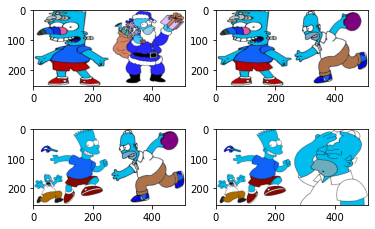

In [14]:
# exemplos das novas imagens

print(np.array(concat_images).shape)

fig, ax = plt.subplots(2,2)

ax[0][0].imshow(concat_images[0]);
ax[0][1].imshow(concat_images[1]);

ax[1][0].imshow(concat_images[26]);
ax[1][1].imshow(concat_images[27]);

In [15]:
# diretórios com as imagens combinadas

try:
    os.mkdir('./simpsons-pix2pix')
    os.mkdir('./simpsons-pix2pix/train')
    os.mkdir('./simpsons-pix2pix/test')
except:
    pass

In [16]:
# salvando as imagens combinadas

for i, (img_train, img_test) in enumerate(zip(X_train, X_test)):
    cv2.imwrite(img=img_train, filename=f'./simpsons-pix2pix/train/bart_and_homer_{i}.jpg');
    cv2.imwrite(img=img_test, filename=f'./simpsons-pix2pix/test/bart_and_homer_{len(X_train)+i}.jpg');